# Baseline Model Exploration

*by Grace*

Hello Team,

In this notebook, I've embarked on an initial exploration of various baseline models for our binary classification task. The primary goal was to establish a foundational understanding of the performance we can expect from some common algorithms, without any extensive tuning or optimization.

## Models Explored:
- **Linear Regression**: Used as a binary classifier with a threshold.
- **Logistic Regression**: A standard approach for binary classification tasks.
- **Dummy Classifier**: Provides predictions based on simple rules, serving as a basic baseline.
- **Decision Tree Classifier**: A simple and interpretable model.
- **Random Forest Classifier**: An ensemble method using multiple decision trees.
- **Support Vector Machine (SVM)**: Explored with a linear kernel.

## Next Steps:
- These models can serve as a starting point. There's ample room for optimization, including hyperparameter tuning, feature engineering, and exploring more complex models.
- It would be beneficial to delve deeper into each model's performance metrics, especially if our dataset has class imbalances.
- Feedback and collaboration are encouraged. If anyone has insights or suggestions on improving these baseline models or wants to introduce other potential models, please share!

Let's collaborate and refine our approach to achieve the best model performance!

In [1]:
import pandas as pd

In [2]:
df = pd.read_csv('../data/df_final.csv')

## EDA
- discover imbalance trend

In [3]:
df.columns

Index(['Unnamed: 0', 'subject_id', 'gender', 'dod',
       'Arterial Blood Pressure systolic', 'Heart rate Alarm - High',
       'Respiratory Rate', 'Anion Gap', 'Bicarbonate', 'Chloride', 'Glucose',
       'MCH', 'MCHC', 'PT', 'RBC', 'RDW', 'Sodium', 'Urea Nitrogen'],
      dtype='object')

In [4]:
df.describe()

,Unnamed: 0,subject_id,gender,dod,Arterial Blood Pressure systolic,Heart rate Alarm - High,Respiratory Rate,Anion Gap,Bicarbonate,Chloride,Glucose,MCH,MCHC,PT,RBC,RDW,Sodium,Urea Nitrogen
count,6182.000000,6.182000e+03,6182.000000,6182.000000,6182.000000,6182.000000,6182.000000,6182.000000,6182.000000,6182.000000,6182.000000,6182.000000,6182.000000,6182.000000,6182.000000,6182.000000,6182.000000,6182.000000
mean,3090.500000,1.500617e+07,0.422193,0.304594,127.384503,124.786477,19.493691,13.817373,25.015529,103.815917,142.422193,30.052782,33.130621,14.685634,10.842608,14.761631,139.308962,23.678259
std,1784.734014,2.884519e+06,0.493949,0.460272,24.732345,152.564441,7.523777,3.621039,4.519001,6.026562,50.136291,2.397594,1.539910,6.573870,39.254623,2.025005,4.989260,17.947870
min,0.000000,1.000235e+07,0.000000,0.000000,11.000000,12.000000,0.000000,4.000000,2.000000,75.000000,36.000000,18.400000,25.900000,8.700000,0.000000,11.100000,101.000000,1.000000
25%,1545.250000,1.252421e+07,0.000000,0.000000,110.000000,120.000000,16.000000,11.000000,22.000000,100.000000,116.000000,28.900000,32.100000,11.900000,2.000000,13.400000,136.000000,13.000000
50%,3090.500000,1.502831e+07,0.000000,0.000000,126.000000,120.000000,19.000000,13.000000,25.000000,104.000000,133.000000,30.200000,33.200000,13.100000,3.000000,14.300000,139.000000,18.000000
75%,4635.750000,1.747863e+07,1.000000,1.000000,143.000000,130.000000,23.000000,16.000000,28.000000,107.000000,154.000000,31.500000,34.200000,14.900000,4.000000,15.600000,142.000000,28.000000
max,6181.000000,1.999944e+07,1.000000,1.000000,273.000000,12090.000000,400.000000,48.000000,45.000000,137.000000,686.000000,40.000000,39.500000,150.000000,918.000000,28.900000,175.000000,193.000000


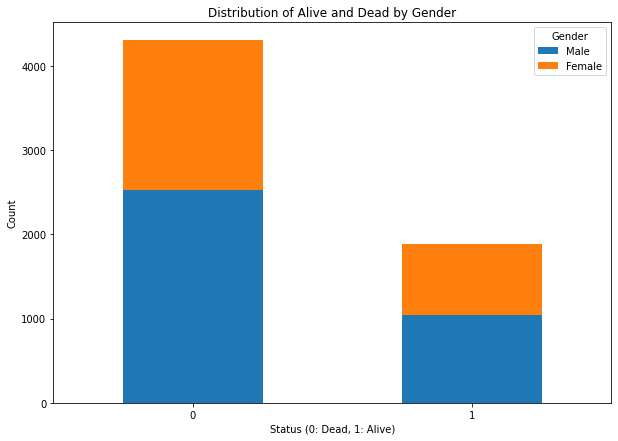

In [5]:
import pandas as pd
import matplotlib.pyplot as plt

# Create a crosstab of 'dod' and 'gender'
ct = pd.crosstab(df['dod'], df['gender'])

# Plot the crosstab as a stacked bar chart
ct.plot(kind='bar', stacked=True, figsize=(10, 7))

# Customize the plot
plt.title('Distribution of Alive and Dead by Gender')
plt.xlabel('Status (0: Dead, 1: Alive)')
plt.ylabel('Count')
plt.xticks(rotation=0)
plt.legend(title='Gender', labels=['Male', 'Female'])  # Adjust labels if needed

# Display the plot
plt.show()


In [10]:
X = df.drop(columns=['dod', 'Unnamed: 0', 'subject_id'])
y = df['dod']

from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


# 1. Linear Regression:


In [11]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

# Train the model
lin_reg = LinearRegression()
lin_reg.fit(X_train, y_train)

# Predict
y_pred_lin = lin_reg.predict(X_test)

# Convert predictions to binary using 0.5 as threshold
y_pred_bin = [1 if y > 0.5 else 0 for y in y_pred_lin]

# Evaluate
print("Linear Regression Evaluation:")
print("Accuracy:", accuracy_score(y_test, y_pred_bin))
print("Classification Report:\n", classification_report(y_test, y_pred_bin))
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred_bin))


Linear Regression Evaluation:
Accuracy: 0.730800323362975
Classification Report:
               precision    recall  f1-score   support

           0       0.74      0.94      0.83       857
           1       0.66      0.25      0.37       380

    accuracy                           0.73      1237
   macro avg       0.70      0.60      0.60      1237
weighted avg       0.72      0.73      0.69      1237

Confusion Matrix:
 [[808  49]
 [284  96]]


# 2. Logistic Regression:

In [12]:
from sklearn.linear_model import LogisticRegression

# Train the model
log_reg = LogisticRegression(max_iter=10000)  # max_iter increased to ensure convergence
log_reg.fit(X_train, y_train)

# Predict
y_pred_log = log_reg.predict(X_test)

# Evaluate
print("\nLogistic Regression Evaluation:")
print("Accuracy:", accuracy_score(y_test, y_pred_log))
print("Classification Report:\n", classification_report(y_test, y_pred_log))
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred_log))



Logistic Regression Evaluation:
Accuracy: 0.7259498787388844
Classification Report:
               precision    recall  f1-score   support

           0       0.74      0.93      0.82       857
           1       0.62      0.27      0.38       380

    accuracy                           0.73      1237
   macro avg       0.68      0.60      0.60      1237
weighted avg       0.71      0.73      0.69      1237

Confusion Matrix:
 [[795  62]
 [277 103]]


# 3. Decision Tree Classifier

In [13]:
from sklearn.tree import DecisionTreeClassifier

tree = DecisionTreeClassifier()
tree.fit(X_train, y_train)
y_pred_tree = tree.predict(X_test)

print("Decision Tree Classifier Evaluation:")
print("Accuracy:", accuracy_score(y_test, y_pred_tree))
print("Classification Report:\n", classification_report(y_test, y_pred_tree))
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred_tree))


Decision Tree Classifier Evaluation:
Accuracy: 0.6337914308811641
Classification Report:
               precision    recall  f1-score   support

           0       0.74      0.73      0.74       857
           1       0.40      0.41      0.41       380

    accuracy                           0.63      1237
   macro avg       0.57      0.57      0.57      1237
weighted avg       0.63      0.63      0.63      1237

Confusion Matrix:
 [[629 228]
 [225 155]]


# 4. Random Forest Classifier

In [14]:
from sklearn.ensemble import RandomForestClassifier

forest = RandomForestClassifier()
forest.fit(X_train, y_train)
y_pred_forest = forest.predict(X_test)

print("Random Forest Classifier Evaluation:")
print("Accuracy:", accuracy_score(y_test, y_pred_forest))
print("Classification Report:\n", classification_report(y_test, y_pred_forest))
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred_forest))


Random Forest Classifier Evaluation:
Accuracy: 0.7299919159256265
Classification Report:
               precision    recall  f1-score   support

           0       0.76      0.90      0.82       857
           1       0.61      0.34      0.44       380

    accuracy                           0.73      1237
   macro avg       0.68      0.62      0.63      1237
weighted avg       0.71      0.73      0.70      1237

Confusion Matrix:
 [[774  83]
 [251 129]]


# 5. SVM Classifier

In [15]:
from sklearn.svm import SVC

svm = SVC(kernel='linear')
svm.fit(X_train, y_train)
y_pred_svm = svm.predict(X_test)

print("SVM Classifier Evaluation:")
print("Accuracy:", accuracy_score(y_test, y_pred_svm))
print("Classification Report:\n", classification_report(y_test, y_pred_svm))
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred_svm))


SVM Classifier Evaluation:
Accuracy: 0.7178658043654002
Classification Report:
               precision    recall  f1-score   support

           0       0.72      0.96      0.83       857
           1       0.67      0.16      0.26       380

    accuracy                           0.72      1237
   macro avg       0.70      0.56      0.54      1237
weighted avg       0.71      0.72      0.65      1237

Confusion Matrix:
 [[827  30]
 [319  61]]


# 6. Deep Learning Approach: NN - MLP (unfinished)

### Imbalance data handling
- SMOTE
- ADASYN

In [6]:
df.head()

,Unnamed: 0,subject_id,gender,dod,Arterial Blood Pressure systolic,Heart rate Alarm - High,Respiratory Rate,Anion Gap,Bicarbonate,Chloride,Glucose,MCH,MCHC,PT,RBC,RDW,Sodium,Urea Nitrogen
0,0,18539548,0,1,111.0,120.0,23.0,18.0,17.0,98.0,101.0,33.2,34.4,32.1,6.0,16.0,134.0,7.0
1,1,19305113,0,1,105.0,120.0,12.0,8.0,20.0,117.0,81.0,34.5,32.8,14.5,14.0,13.5,129.0,17.0
2,2,18770897,1,0,106.0,100.0,17.0,11.0,26.0,104.0,110.0,31.0,34.4,13.8,3.0,12.9,140.0,23.0
3,3,10285325,0,1,158.0,120.0,27.0,19.0,19.0,101.0,129.0,30.5,33.6,22.1,3.0,18.1,134.0,54.0
4,4,10342123,0,1,114.0,140.0,22.0,15.0,20.0,107.0,113.0,31.6,32.6,15.9,83.0,14.1,138.0,28.0


In [7]:
X = df.drop(columns=['dod', 'Unnamed: 0', 'subject_id'])
y = df['dod']

from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


### Apply SMOTE

In [8]:
from imblearn.over_sampling import SMOTE
smote = SMOTE(random_state=42)
X_smote, y_smote = smote.fit_resample(X_train, y_train)


### Apply ADASYN

In [9]:
from imblearn.over_sampling import ADASYN
adasyn = ADASYN(random_state=42)
X_adasyn, y_adasyn = adasyn.fit_resample(X_train, y_train)


### Apply MLP

##